In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('Housing.csv', quoting=3)

In [11]:
print("NAs")
for column in dataset:
    print(column+": ",end=" ")
    print(sum(dataset[column].isna()))


NAs
price:  0
area:  0
bedrooms:  0
bathrooms:  0
stories:  0
mainroad:  0
guestroom:  0
basement:  0
hotwaterheating:  0
airconditioning:  0
parking:  0
prefarea:  0
furnishingstatus:  0


In [12]:
print("Uniques")
for column in dataset:
    print(column+": ",end=" ")
    print(len(dataset[column].unique()))


Uniques
price:  219
area:  284
bedrooms:  6
bathrooms:  4
stories:  4
mainroad:  2
guestroom:  2
basement:  2
hotwaterheating:  2
airconditioning:  2
parking:  4
prefarea:  2
furnishingstatus:  3


In [13]:
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = dataset.select_dtypes(include=['object', 'bool']).columns

In [14]:
dataset[numerical_cols].describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

no_yes_encoder = OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes'],['no','yes'],['no','yes'],['no','yes']])


steps = [
    ('n',no_yes_encoder,
     ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']),
    ('f', OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']]), ['furnishingstatus'])
]
encoder = ColumnTransformer(transformers=steps, remainder='passthrough')
dataset = encoder.fit_transform(dataset)

In [16]:

dataset = pd.DataFrame(dataset,columns=encoder.get_feature_names_out())

<Axes: >

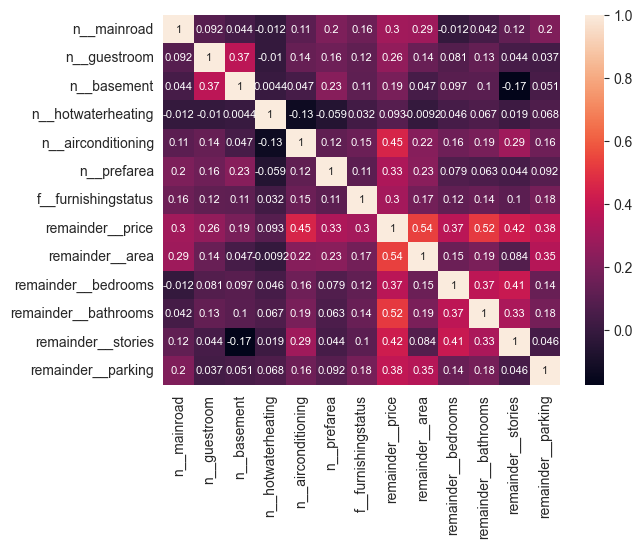

In [22]:
import seaborn as sns

sns.heatmap(dataset.corr(), annot=True,cmap="rocket", annot_kws={'fontsize': 8})

<Axes: >

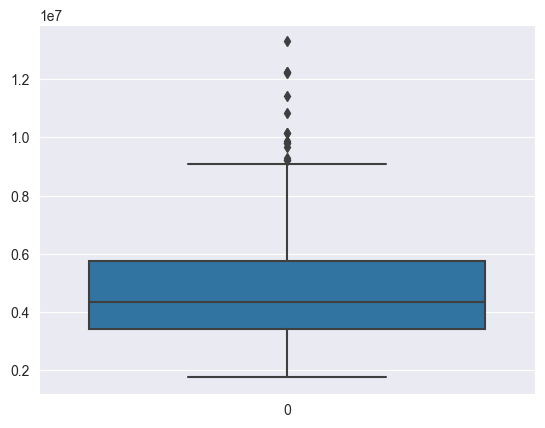

In [23]:
sns.boxplot(dataset['remainder__price'])

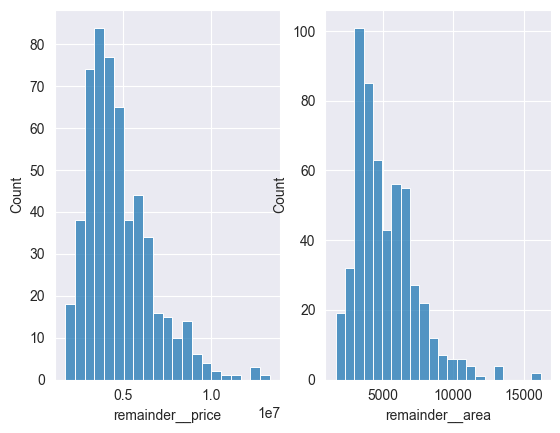

In [26]:
fig, ax =plt.subplots(1,2)
sns.histplot(dataset['remainder__price'], ax=ax[0])
sns.histplot(dataset['remainder__area'], ax=ax[1])
plt.show()